# Project: TMDB - Movie 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, I went through data cleaning and a bit of feature engineering. Mainly the exploratory data analysis briefly walks through the cleaned dataset and in particular looks over the following questions.

What are the movies that profit the most or the least? Are there any variables that could be indicative of this?

What are the movies that has the most or the least budget? Are there any variables that could be related to this?

Which month would be the best for a production company to release the movie?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> Now looking at the dataset, there are several columns having null values. Some other variables contains great amount of text information which would require a more thorough natural language processing. For the sake of this analysis, we can ignore those for now. Dropping null values and make sure the datatype is correct, such as release_date, would be essential in the cleaning steps. Now let's look at how the numerical values look.

In [5]:
# dropping irrelevant columns
# here I chose revenue and budget over the adjusted ones
df.drop(columns=['id', 'imdb_id', 'budget_adj', 'tagline',
                 'revenue_adj', 'homepage', 'keywords', 'overview', 
                 'production_companies'], inplace=True)

In [6]:
# statistics on numerical values
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


>By looking at the descriptive statistics, it may not be a good choice to include the vote-average and the vote_count in the analysis because they are not measured on the same scale. Without the actual voting information for each movie, it cannot be normalized to the same scale for a fair comparison.

In [7]:
# dropping votes-related variables
df.drop(columns=['vote_count','vote_average'], inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2015


In [8]:
# check and remove duplicates
print("Number of duplicates is", df.duplicated().sum())

df.drop_duplicates(keep='first', inplace=True)

print("Dropped. Check Again. Number of duplicates is", df.duplicated().sum())

Number of duplicates is 1
Dropped. Check Again. Number of duplicates is 0


In [9]:
# drop 0 values in budget
df = df[(df['budget'] !=0) & (df['revenue'] !=0)]

In [10]:
# check numerical variables
df.describe()

,popularity,budget,revenue,runtime,release_year
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000
mean,1.191554,3.720370e+07,1.076866e+08,109.220291,2001.261028
std,1.475162,4.220822e+07,1.765393e+08,19.922820,11.282575
min,0.001117,1.000000e+00,2.000000e+00,15.000000,1960.000000
25%,0.462368,1.000000e+07,1.360003e+07,95.000000,1995.000000
50%,0.797511,2.400000e+07,4.480000e+07,106.000000,2004.000000
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,338.000000,2015.000000


In [11]:
# check the datatype and count
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      3854 non-null   float64
 1   budget          3854 non-null   int64  
 2   revenue         3854 non-null   int64  
 3   original_title  3854 non-null   object 
 4   cast            3850 non-null   object 
 5   director        3853 non-null   object 
 6   runtime         3854 non-null   int64  
 7   genres          3854 non-null   object 
 8   release_date    3854 non-null   object 
 9   release_year    3854 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 331.2+ KB


In [12]:
# drop rows with null values in cast and director
df = df.dropna(subset=['cast','director'])

In [13]:
# check null values again
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
release_year      0
dtype: int64

In [14]:
# change datatype for release date
df['release_date'] = pd.to_datetime(df['release_date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      3849 non-null   float64       
 1   budget          3849 non-null   int64         
 2   revenue         3849 non-null   int64         
 3   original_title  3849 non-null   object        
 4   cast            3849 non-null   object        
 5   director        3849 non-null   object        
 6   runtime         3849 non-null   int64         
 7   genres          3849 non-null   object        
 8   release_date    3849 non-null   datetime64[ns]
 9   release_year    3849 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 330.8+ KB


>After cleaning the dataset, we have 3849 rows and 10 columns of info on movies.

<a id='eda'></a>
## Exploratory Data Analysis
### Question 1: Movies that profit the most and the least. What are the relationships between the profit and other variables?

In [16]:
# calculating profit
df['profit'] = df['revenue']-df['budget']

In [17]:
df['profit'].describe()

count    3.849000e+03
mean     7.056595e+07
std      1.506990e+08
min     -4.139124e+08
25%     -1.312284e+06
50%      2.014450e+07
75%      8.198066e+07
max      2.544506e+09
Name: profit, dtype: float64

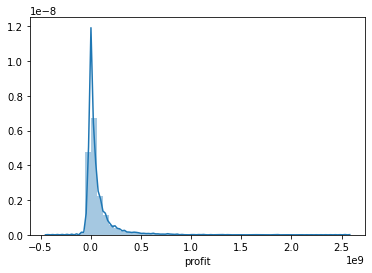

In [18]:
sns.distplot(df['profit'])

In [19]:
# max profit
df.loc[df['profit'].idxmax()]

popularity                                                  9.43277
budget                                                    237000000
revenue                                                  2781505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                              James Cameron
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
release_year                                                   2009
profit                                                   2544505847
Name: 1386, dtype: object

In [20]:
# min profit
df.loc[df['profit'].idxmin()]

popularity                                                  0.25054
budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                 Sngmoo Lee
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                    2010-12-02 00:00:00
release_year                                                   2010
profit                                                   -413912431
Name: 2244, dtype: object

Popularity vs Profit

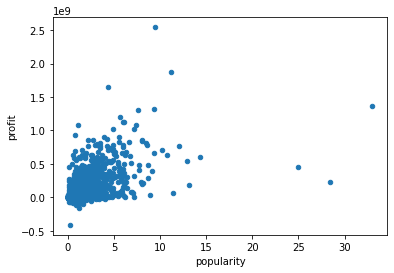

In [21]:
df.plot.scatter(x='popularity', y='profit')

Datapoints clustered too much. Log both axis to examine.

/Users/jianxing/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jianxing/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


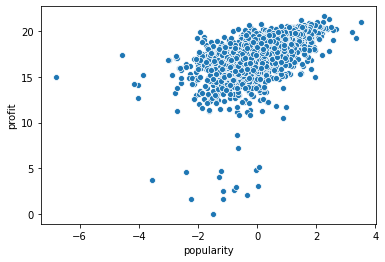

In [22]:
sns.scatterplot(x=np.log(df["popularity"]), y=np.log(df["profit"]))

>After log both variables, there appears to be a linear relationship between the popularity and the profit. This makes sense that normally a popular movie would tend to make more money by having great box office numbers.

Budget vs Profit

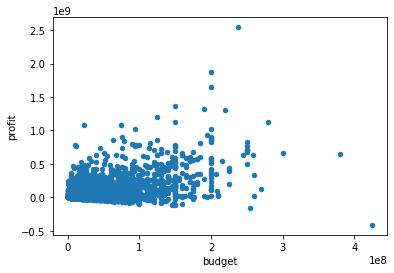

In [23]:
df.plot.scatter(x='budget', y='profit')

Datapoints clustered too much. Log both axis to examine.

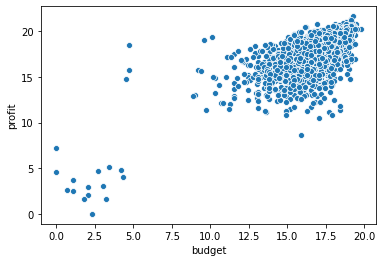

In [24]:
sns.scatterplot(x=np.log(df["budget"]), y=np.log(df["profit"]))

>On log-log scale, budget and the profit appear to have a linear relationship.

Runtime vs Profit

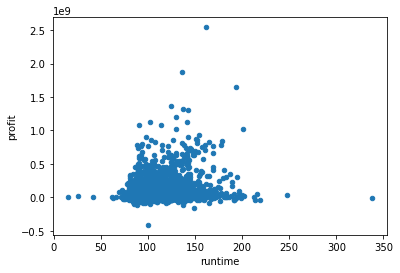

In [25]:
df.plot.scatter(x='runtime', y='profit')

Datapoints clustered too much. Log both axis to examine.

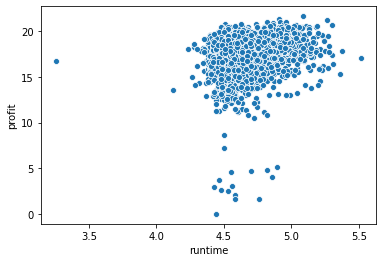

In [26]:
sns.scatterplot(x=np.log(df["runtime"]), y=np.log(df["profit"]))

>There is no obvious relationship between two variables.

>Up till now, profit might be correlated with popularity and the budget.

### Question 2: Looking at the data budget-wise

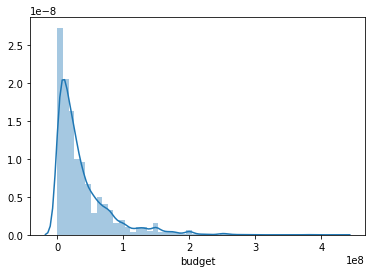

In [27]:
sns.distplot(df['budget'])

In [28]:
 # max budget
df.loc[df['budget'].idxmax()]

popularity                                                  0.25054
budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                 Sngmoo Lee
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                    2010-12-02 00:00:00
release_year                                                   2010
profit                                                   -413912431
Name: 2244, dtype: object

In [29]:
# min budget
df.loc[df['budget'].idxmin()]

popularity                                                 0.090186
budget                                                            1
revenue                                                         100
original_title                                         Lost & Found
cast              David Spade|Sophie Marceau|Ever Carradine|Step...
director                                               Jeff Pollack
runtime                                                          95
genres                                               Comedy|Romance
release_date                                    1999-04-23 00:00:00
release_year                                                   1999
profit                                                           99
Name: 2618, dtype: object

>Interestingly, The Warrior's Way had the most budget but made the least profit. Could it because the more budget a movie has, the harder for them to make profit as it has to sell more? This could further suggest the potential relationship between the budget and the profit. 

Runtime vs Budget

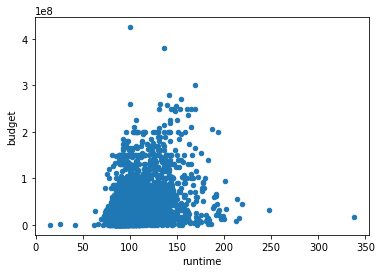

In [30]:
df.plot.scatter(x='runtime', y='budget')

Datapoints clustered too much. Log both axis to examine.

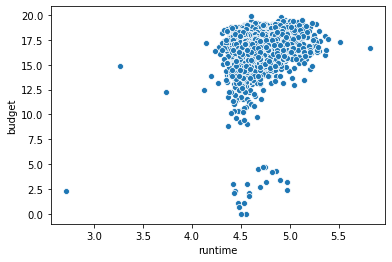

In [31]:
sns.scatterplot(x=np.log(df["runtime"]), y=np.log(df["budget"]))

>Interesting to see that the budget and the runtime is not related in both scales.

Popularity vs Budget

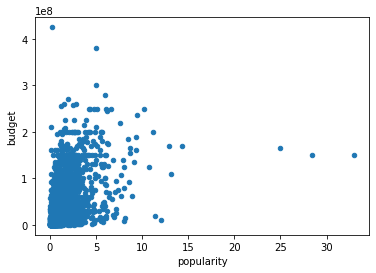

In [32]:
df.plot.scatter(x='popularity', y='budget')

Datapoints clustered too much. Log both axis to examine.

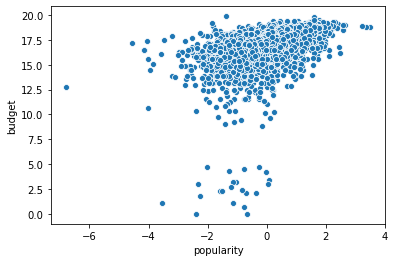

In [33]:
sns.scatterplot(x=np.log(df["popularity"]), y=np.log(df["budget"]))

>There appears to be a weak linear relationship between the two variables on log-log scale. It could make sense in a way that popular movies have favorable actors, directors or existing popular film series. For example, Star Wars are very popular across the globa and viewrs are really looking forward to these films. Therefore, the production of such films are held at a very high expectations, which would require more budget to make it perfect.

### Question 3: Looking at the data runtime-wise

In [34]:
 # max budget
df.loc[df['runtime'].idxmax()]

popularity                                                 0.534192
budget                                                     18000000
revenue                                                      871279
original_title                                               Carlos
cast              Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...
director                                            Olivier Assayas
runtime                                                         338
genres                                 Crime|Drama|Thriller|History
release_date                                    2010-05-19 00:00:00
release_year                                                   2010
profit                                                    -17128721
Name: 2107, dtype: object

In [35]:
# min budget
df.loc[df['runtime'].idxmin()]

popularity                                                 0.208637
budget                                                           10
revenue                                                           5
original_title                                          Kid's Story
cast              Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director                                        Shinichiro Watanabe
runtime                                                          15
genres                                    Science Fiction|Animation
release_date                                    2003-06-02 00:00:00
release_year                                                   2003
profit                                                           -5
Name: 5162, dtype: object

>Interestingly, both the longest movie and the shortest movie weren't able to profit. 

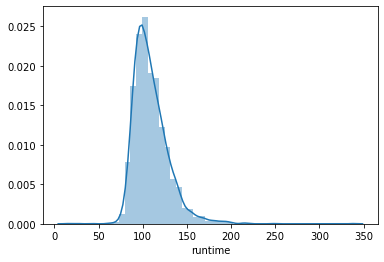

In [36]:
sns.distplot(df['runtime'])

In [37]:
df['runtime'].describe()

count    3849.000000
mean      109.217459
std        19.914141
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

### Question 4: Looking at the dataset over time.

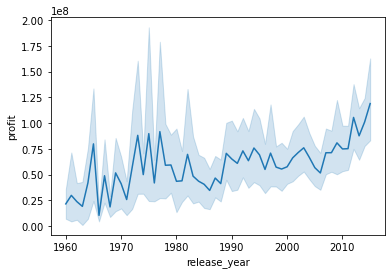

In [38]:
sns.lineplot(x='release_year',y='profit',data=df)

In [39]:
df['month'] = df['release_date'].apply(lambda x: x.month)

In [40]:
rev_month = df.groupby('month')['revenue'].sum()

In [41]:
pro_month = df.groupby('month')['profit'].sum()

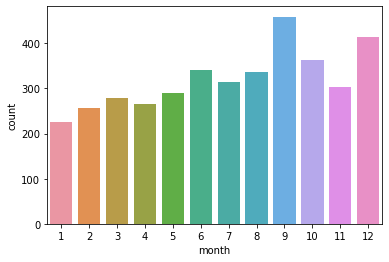

In [42]:
# look at movie releases by month
sns.countplot(df['month'])

>The above plot shows that the September and December are the two months that have the most movie releases.

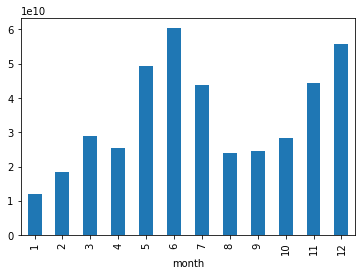

In [43]:
rev_month.plot(kind='bar')

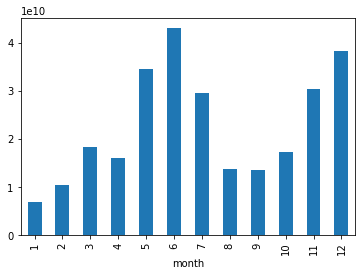

In [44]:
pro_month.plot(kind='bar')

>Two plots above suggest that June and December are the best two months for movie release in profitable sense. This could be largely due to the holiday season where more people, especially students got chances to see more movies. However, it is interesting to notice that September is significantly less profitable than most of the months during a year eventhough the number of release is among the highest.

<a id='conclusions'></a>
## Conclusions

>In this exploration, we've come to the conclusion that the profit seems to be related with budget and popularity. Budget is related to popularity.


>Looking overtime, September and December are the two monthes with the most movie releases. However, in a profitable standpoint, releasing movies in June and December makes the most sense.

>In order to take this analysis further, it would be worth looking at which genre is best at profiting and at gaining popularity. To make those movies popular, what are some choices in actors and directors, in which genre. Releasing what kind movie in which month of the year could also be critical. In addition,  what is a critical point of budget to make the most profitable movie in the right moment, with the right sets of resources?

>Limitations: In this analysis, voting_average and voting_count is removed due to incompleteness of information. The fact that each movie's reviews significantly differ from each other, and without more detailed statistics of that voting data, it is not wise to directly draw any conclusions or observations based on these two variables. It would be indeed interesting to see how voting and other variables related. Maybe based on voting, a predictive model could be built to see how popular a movie would be and how much revenue a movie could generate. In addition to this, data cleaning process took out a great amount of datapoints, which is too aggressive and not ideal. With less null values and more valid information, the analysis could be more comprehensive and robust. 

<a id='reference'></a>
## Reference

N/A